In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
## import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
## Divided into dataset dependent and independent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
print(X.head())
print("===================================================")
print("Y:",y.head())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1        101348.88  
1          0               1        112542.58  
2          1               0        113931.57  
3          0               0         93826.63  
4          1               1         79084.10  
Y: 0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [ ]:
## Feature Engineering  // ONEHOTENCODING
geography = pd.get_dummies(X['Geography'].astype(str), drop_first=True).astype(int)
gender = pd.get_dummies(X['Gender'].astype(str), drop_first=True).astype(int)

print(geography)
print(gender)

      Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]
      Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]


In [ ]:
## Concate these variables with dataframes
X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
## Splitting the dataset into train_test_spit
!pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
## Feature Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test - sc.transform(X_test)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597.552043,35.368904,6.955263,131100.160697,1.921591,0.357405,0.031262,192851.059143,-0.754865,0.573694,1.091687
898,524.314903,39.890383,3.031415,102966.980278,1.921591,0.357405,1.032270,128701.604130,0.569844,0.573694,1.091687
2398,705.428370,41.698974,6.955263,95386.511417,1.921591,0.357405,0.031262,75732.674787,0.569844,-0.743090,1.091687
5906,786.583039,32.656016,4.339364,112079.004664,1.921591,1.556190,1.032270,89368.777777,0.569844,0.573694,0.083987
2343,705.428370,38.081791,4.993339,163033.430389,1.190497,0.357405,0.031262,135661.553158,-0.754865,0.573694,0.083987
...,...,...,...,...,...,...,...,...,...,...,...
1037,625.263393,25.421650,2.377440,1.215717,1.190497,0.357405,0.031262,180968.145681,0.569844,0.573694,1.091687
2899,586.665441,35.368904,6.301288,1.215717,1.190497,0.357405,1.032270,70761.201196,0.569844,0.573694,1.091687
9549,578.747912,36.273200,2.377440,157266.652545,1.190497,0.357405,1.032270,141532.471115,0.569844,-0.743090,0.083987
2740,650.005670,34.464608,4.339364,142392.050248,1.921591,0.357405,0.031262,11278.025078,-0.754865,0.573694,0.083987


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
9394,597,35,8,131101.04,1,1,1,192852.67,1,0,0
898,523,40,2,102967.41,1,1,0,128702.10,0,0,0
2398,706,42,8,95386.82,1,1,1,75732.25,0,1,0
5906,788,32,4,112079.58,1,0,0,89368.59,0,0,1
2343,706,38,5,163034.82,2,1,1,135662.17,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,625,24,1,0.00,2,1,1,180969.55,0,0,0
2899,586,35,7,0.00,2,1,0,70760.69,0,0,0
9549,578,36,1,157267.95,2,1,0,141533.19,0,1,1
2740,650,34,4,142393.11,1,1,1,11276.48,1,0,1


In [ ]:
X_train.shape

(8000, 11)

In [ ]:
X_test.shape

(2000, 11)

In [ ]:
## PART-2 :-  Now lets create the "ANN"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LeakyReLU, PReLU, ELU, ReLU, Dropout

In [ ]:
## Lets initialize the ANN
classfier = Sequential()

In [ ]:
classfier

<Sequential name=sequential_7, built=False>

In [ ]:
## Ading the input Layer
classfier.add(Dense(units=11 , activation = 'relu'))

In [ ]:
## Adding the first hidden layer
classfier.add(Dense(units=7 , activation = 'relu'))

In [ ]:
## Adding the secpng hidden layer
classfier.add(Dense(units=6, activation = 'relu'))

In [ ]:
## Adding the Ooutput layer
classfier.add(Dense(1,activation = 'sigmoid'))

In [ ]:
classfier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
import tensorflow as tf
from tensorflow import keras
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [ ]:
print(optimizer)

In [ ]:
model_history = classfier.fit(X_train , y_train,validation_split = 0.33 , batch_size = 10 , epochs = 1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.7738 - loss: 0.5701 - val_accuracy: 0.7955 - val_loss: 0.4564
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7911 - loss: 0.4405 - val_accuracy: 0.7955 - val_loss: 0.4261
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8036 - loss: 0.4029 - val_accuracy: 0.7955 - val_loss: 0.4072
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8033 - loss: 0.3806 - val_accuracy: 0.8228 - val_loss: 0.3967
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8324 - loss: 0.3796 - val_accuracy: 0.8372 - val_loss: 0.3901
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8532 - loss: 0.3698 - val_accuracy: 0.8406 - val_loss: 0.3856
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8528 - loss: 0.3627 - val_accuracy: 0.8387 - val_loss: 0.3834
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8423 - loss: 0.3664 -

In [ ]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

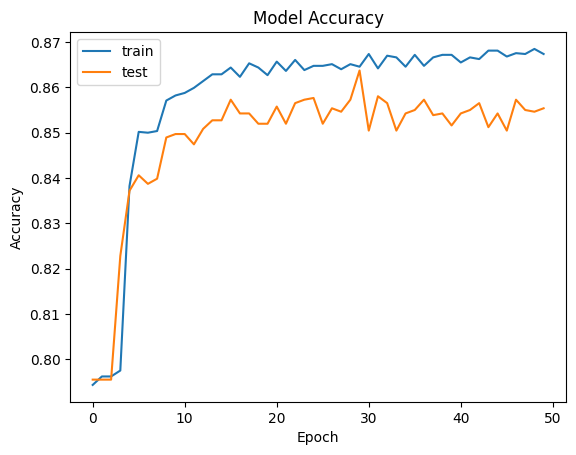

In [ ]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['train' , 'test'],loc='upper left')
plt.show()

In [ ]:
## part3 - Making the prediction and evaluating the model
# Predicting the Test set results
y_pred = classfier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
## Make the confusion matric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1545,   50],
       [ 387,   18]])

In [ ]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred , y_test)

In [ ]:
score

0.7815

In [ ]:
## get the weights
classifier.get_weights()

[]